In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, ARDRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
results = pd.read_csv('../../Data/ResultData/ADAUSDT_7_5_wave_trend_results.csv')

In [3]:
results.head()

,symbol,indicator,start_date,end_date,ob_level,os_level,k,mean,std,skewness,kurtosis,entropy,n_total_partitions,n_partitions,clean_gains
0,ADA/USDT,wave_trend,2020-09-12 00:01:00,2020-09-19 00:00:00,43,-63,0.001,0.094280,0.002346,0.055612,-0.985233,9.217999,68,8,0.157059
1,ADA/USDT,wave_trend,2020-10-03 00:01:00,2020-10-10 00:00:00,43,-63,0.001,0.095097,0.002326,0.409831,-0.210873,9.218010,75,11,4.233419
2,ADA/USDT,wave_trend,2020-09-19 00:01:00,2020-09-26 00:00:00,43,-63,0.002,0.085529,0.005681,0.283234,-1.222078,9.216114,62,2,1.832861
3,ADA/USDT,wave_trend,2020-10-24 00:01:00,2020-10-31 00:00:00,43,-63,0.001,0.102092,0.005335,-0.429036,-1.028970,9.216932,83,36,-13.175106
4,ADA/USDT,wave_trend,2020-10-03 00:01:00,2020-10-10 00:00:00,43,-63,0.002,0.095097,0.002326,0.409831,-0.210873,9.218010,72,12,3.616770


In [4]:
for index, row in results.iterrows():
    print(row['start_date'] + ' - ' + row['end_date'])

2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-10-03 00:01:00 - 2020-10-10 00:00:00
2020-09-19 00:01:00 - 2020-09-26 00:00:00
2020-10-24 00:01:00 - 2020-10-31 00:00:00
2020-10-03 00:01:00 - 2020-10-10 00:00:00
2020-10-31 00:01:00 - 2020-11-07 00:00:00
2020-09-26 00:01:00 - 2020-10-03 00:00:00
2020-09-19 00:01:00 - 2020-09-26 00:00:00
2020-10-03 00:01:00 - 2020-10-10 00:00:00
2020-11-07 00:01:00 - 2020-11-14 00:00:00
2020-10-31 00:01:00 - 2020-11-07 00:00:00
2020-10-17 00:01:00 - 2020-10-24 00:00:00
2020-10-03 00:01:00 - 2020-10-10 00:00:00
2020-11-14 00:01:00 - 2020-11-21 00:00:00
2020-11-07 00:01:00 - 2020-11-14 00:00:00
2020-10-24 00:01:00 - 2020-10-31 00:00:00
2020-10-10 00:01:00 - 2020-10-17 00:00:00
2020-10-17 00:01:00 - 2020-10-24 00:00:00
2020-10-03 00:01:00 - 2020-10-10 00:00:00
2020-11-07 00:01:00 - 2020-11-14 00:00:00
2020-10-24 00:01:00 - 2020-10-31 00:00:00
2020-10-10 00:01:00 - 2020-10-17 00:00:00
2020-09-19 00:01:00 - 2020-09-26 00:00:00
2020-10-17 00:01:00 - 2020-10-24 0

2020-10-17 00:01:00 - 2020-10-24 00:00:00
2020-10-10 00:01:00 - 2020-10-17 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-11-14 00:01:00 - 2020-11-21 00:00:00
2020-10-31 00:01:00 - 2020-11-07 00:00:00
2020-10-03 00:01:00 - 2020-10-10 00:00:00
2020-09-19 00:01:00 - 2020-09-26 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-10-10 00:01:00 - 2020-10-17 00:00:00
2020-11-07 00:01:00 - 2020-11-14 00:00:00
2020-10-17 00:01:00 - 2020-10-24 00:00:00
2020-10-10 00:01:00 - 2020-10-17 00:00:00
2020-10-31 00:01:00 - 2020-11-07 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-10-17 00:01:00 - 2020-10-24 00:00:00
2020-09-26 00:01:00 - 2020-10-03 00:00:00
2020-10-24 00:01:00 - 2020-10-31 00:00:00
2020-10-31 00:01:00 - 2020-11-07 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-10-03 00:01:00 - 2020-10-10 00:00:00
2020-10-10 00:01:00 - 2020-10-17 00:00:00
2020-10-17 00:01:00 - 2020-10-24 00:00:00
2020-11-14 00:01:00 - 2020-11-21 00:00:00
2020-11-21 00:01:00 - 2020-11-28 0

2021-01-09 00:01:00 - 2021-01-16 00:00:00
2021-01-02 00:01:00 - 2021-01-09 00:00:00
2020-12-12 00:01:00 - 2020-12-19 00:00:00
2020-12-19 00:01:00 - 2020-12-26 00:00:00
2021-01-23 00:01:00 - 2021-01-30 00:00:00
2020-12-05 00:01:00 - 2020-12-12 00:00:00
2020-12-19 00:01:00 - 2020-12-26 00:00:00
2021-01-23 00:01:00 - 2021-01-30 00:00:00
2021-01-09 00:01:00 - 2021-01-16 00:00:00
2020-12-05 00:01:00 - 2020-12-12 00:00:00
2020-12-19 00:01:00 - 2020-12-26 00:00:00
2020-12-26 00:01:00 - 2021-01-02 00:00:00
2020-12-12 00:01:00 - 2020-12-19 00:00:00
2020-12-19 00:01:00 - 2020-12-26 00:00:00
2020-11-28 00:01:00 - 2020-12-05 00:00:00
2020-12-12 00:01:00 - 2020-12-19 00:00:00
2020-12-19 00:01:00 - 2020-12-26 00:00:00
2021-01-30 00:01:00 - 2021-02-05 23:59:00
2021-01-09 00:01:00 - 2021-01-16 00:00:00
2020-12-12 00:01:00 - 2020-12-19 00:00:00
2021-01-16 00:01:00 - 2021-01-23 00:00:00
2021-01-02 00:01:00 - 2021-01-09 00:00:00
2020-11-28 00:01:00 - 2020-12-05 00:00:00
2020-12-12 00:01:00 - 2020-12-19 0

2021-01-23 00:01:00 - 2021-01-30 00:00:00
2021-01-30 00:01:00 - 2021-02-05 23:59:00
2020-12-26 00:01:00 - 2021-01-02 00:00:00
2020-12-19 00:01:00 - 2020-12-26 00:00:00
2020-12-12 00:01:00 - 2020-12-19 00:00:00
2021-01-30 00:01:00 - 2021-02-05 23:59:00
2020-12-26 00:01:00 - 2021-01-02 00:00:00
2020-12-05 00:01:00 - 2020-12-12 00:00:00
2020-11-28 00:01:00 - 2020-12-05 00:00:00
2020-12-19 00:01:00 - 2020-12-26 00:00:00
2021-01-23 00:01:00 - 2021-01-30 00:00:00
2020-12-19 00:01:00 - 2020-12-26 00:00:00
2020-12-26 00:01:00 - 2021-01-02 00:00:00
2021-01-16 00:01:00 - 2021-01-23 00:00:00
2021-01-09 00:01:00 - 2021-01-16 00:00:00
2020-11-28 00:01:00 - 2020-12-05 00:00:00
2020-12-26 00:01:00 - 2021-01-02 00:00:00
2021-01-16 00:01:00 - 2021-01-23 00:00:00
2021-01-09 00:01:00 - 2021-01-16 00:00:00
2020-12-12 00:01:00 - 2020-12-19 00:00:00
2020-12-26 00:01:00 - 2021-01-02 00:00:00
2021-01-09 00:01:00 - 2021-01-16 00:00:00
2020-12-12 00:01:00 - 2020-12-19 00:00:00
2020-12-26 00:01:00 - 2021-01-02 0

array([[<AxesSubplot:title={'center':'clean_gains'}>]], dtype=object)

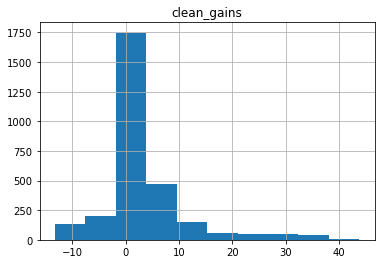

In [5]:
non_zero_results = results[results['clean_gains'] != 0]
non_zero_results.hist(column = 'clean_gains')

For each time frame:
* Build ML models (including hyperparameter tunning)
* Evaluate them
* Select model
* Store optimal values in dataset if the R^2 is greater than 0.8 and clean gains are positive

ML algorithms used:
* Linear Regression
* Ridge Regression
* Stochastic Gradient Descent
* Bayesian ARD Regression
* BayesianRidge
* Decision Tree Regressor
* Support Vector Regressor
* NuSVR
* KNN Regressor
* Gradient Boosting Regressor

MLP and Random Forests Regressor excluded at the moment (small datasets)

Lasso and ElasticNet were excluded because they implement variable selection

# Generate train and test datasets

In [6]:
df = results[results['clean_gains'] != 0]

start_date = df.iloc[0]['start_date']
start_date = datetime.strptime('2020-10-31 00:01:00', '%Y-%m-%d %H:%M:%S')
end_date = start_date + timedelta(days = 7)
df = df[(df['start_date'] >= str(start_date)) & (df['end_date'] < str(end_date))]

df = df.sample(frac=1)
df = df.reset_index(drop=True)

X = df[['ob_level', 'os_level', 'k']].to_numpy()
y = df['clean_gains'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
k_test = []
for x in X_test:
    k_test.append(x[2])

In [8]:
r2_scores = []  # stores the performance results of all the models

# Linear regression

In [9]:
linear = LinearRegression()

linear.fit(X_train, y_train)

linear_y_pred = linear.predict(X_test)

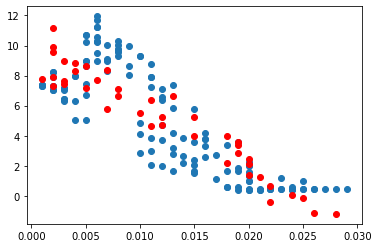

In [10]:
plt.scatter(df['k'], y)

plt.scatter(k_test, linear_y_pred, color = 'r')

In [11]:
linear_R2 = metrics.r2_score(y_test, linear_y_pred)
print(linear_R2)

0.8050416856421522


In [12]:
arr = [linear, linear_R2]
r2_scores.append(arr)

# Ridge regression

In [13]:
param_grid = {'alpha': np.arange(0.00001, 0.001, 0.00001)}

model = Ridge()

clf = GridSearchCV(model, param_grid)

clf.fit(X_train, y_train)

ridge = clf.best_estimator_

ridge_y_pred = ridge.predict(X_test)

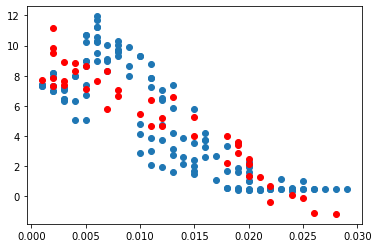

In [14]:
plt.scatter(df['k'], y)

plt.scatter(k_test, ridge_y_pred, color = 'r')

In [15]:
ridge_R2 = metrics.r2_score(y_test, ridge_y_pred)
print(ridge_R2)

0.8066444509464084


In [16]:
arr = [ridge, ridge_R2]
r2_scores.append(arr)

# Stochastic Gradient Descent

In [17]:
sgd = SGDRegressor()

sgd.fit(X_train, y_train)

sgd_y_pred = linear.predict(X_test)

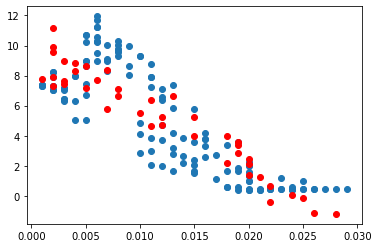

In [18]:
plt.scatter(df['k'], y)

plt.scatter(k_test, sgd_y_pred, color = 'r')

In [19]:
sgd_R2 = metrics.r2_score(y_test, sgd_y_pred)
print(sgd_R2)

0.8050416856421522


In [20]:
arr = [sgd, sgd_R2]
r2_scores.append(arr)

# Bayesian ARD Regression

In [21]:
ard = ARDRegression()

ard.fit(X_train, y_train)

ard_y_pred = linear.predict(X_test)

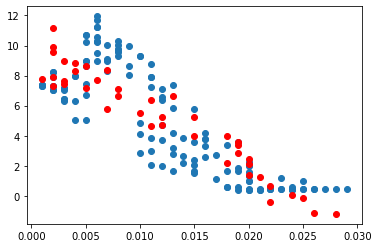

In [22]:
plt.scatter(df['k'], y)

plt.scatter(k_test, ard_y_pred, color = 'r')

In [23]:
ard_R2 = metrics.r2_score(y_test, ard_y_pred)
print(ard_R2)

0.8050416856421522


In [24]:
arr = [ard, ard_R2]
r2_scores.append(arr)

# BayesianRidge

In [25]:
bayesian_ridge = BayesianRidge()

bayesian_ridge.fit(X_train, y_train)

bayesian_ridge_y_pred = bayesian_ridge.predict(X_test)

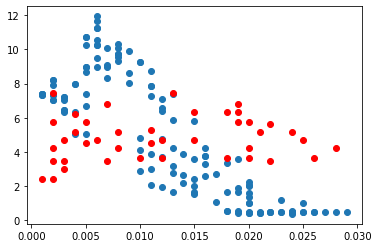

In [26]:
plt.scatter(df['k'], y)

plt.scatter(k_test, bayesian_ridge_y_pred, color = 'r')

In [27]:
bayesian_ridge_R2 = metrics.r2_score(y_test, bayesian_ridge_y_pred)
print(bayesian_ridge_R2)

-0.09290875246818575


In [28]:
arr = [bayesian_ridge, bayesian_ridge_R2]
r2_scores.append(arr)

# DecisionTreeRegressor

In [29]:
param_grid = {'random_state': range(0, 10),
             'criterion': ['mse', 'friedman_mse', 'mae'],
             'splitter': ['best', 'random']}

model = DecisionTreeRegressor()

clf = GridSearchCV(model, param_grid)

clf.fit(X_train, y_train)

dt = clf.best_estimator_

dt_y_pred = dt.predict(X_test)

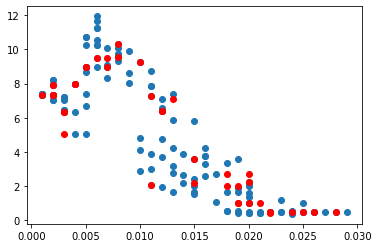

In [30]:
plt.scatter(df['k'], y)

plt.scatter(k_test, dt_y_pred, color = 'r')

In [31]:
dt_R2 = metrics.r2_score(y_test, dt_y_pred)
print(dt_R2)

0.8588627661481321


In [32]:
arr = [dt, dt_R2]
r2_scores.append(arr)

# Support Vector Regressor

In [33]:
param_grid = {'C':[1, 10, 100, 1000], 
              'epsilon':np.arange(0.01, 1, 0.01)}

model = SVR()

clf = GridSearchCV(model, param_grid)

clf.fit(X_train, y_train)

svr = clf.best_estimator_

svr_y_pred = svr.predict(X_test)

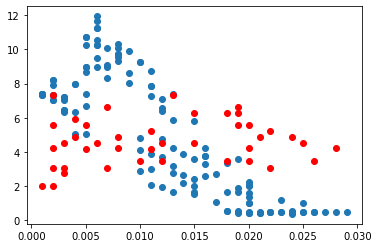

In [34]:
plt.scatter(df['k'], y)

plt.scatter(k_test, svr_y_pred, color = 'r')

In [35]:
svr_R2 = metrics.r2_score(y_test, svr_y_pred)
print(svr_R2)

-0.1184227053832756


In [36]:
arr = [svr, svr_R2]
r2_scores.append(arr)

# NuSVR

In [37]:
param_grid = {'C': [1, 10, 100, 1000],
             'nu': np.arange(0.01, 1, 0.01)}

model = NuSVR()

clf = GridSearchCV(model, param_grid)

clf.fit(X_train, y_train)

nu_svr = clf.best_estimator_

nu_svr_y_pred = nu_svr.predict(X_test)

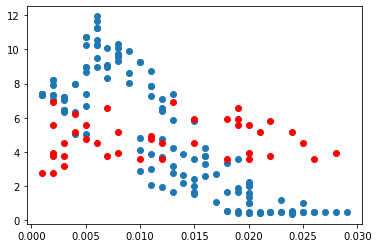

In [38]:
plt.scatter(df['k'], y)

plt.scatter(k_test, nu_svr_y_pred, color = 'r')

In [39]:
nu_svr_R2 = metrics.r2_score(y_test, nu_svr_y_pred)
print(nu_svr_R2)

-0.06974708323003176


In [40]:
arr = [nu_svr, nu_svr_R2]
r2_scores.append(arr)

# KNN Regressor

In [41]:
param_grid = {'n_neighbors': range(2, 30)}

model = KNeighborsRegressor()

clf = GridSearchCV(model, param_grid)

clf.fit(X_train, y_train)

knn = clf.best_estimator_

knn_y_pred = knn.predict(X_test)

In [42]:
print(clf.best_params_)

{'n_neighbors': 9}


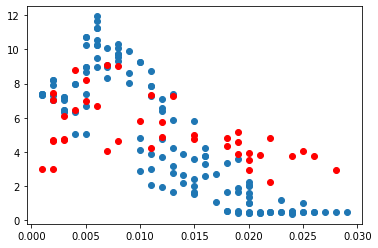

In [43]:
plt.scatter(df['k'], y)

plt.scatter(k_test, knn_y_pred, color = 'r')

In [44]:
knn_R2 = metrics.r2_score(y_test, knn_y_pred)
print(knn_R2)

0.40197151718915713


In [45]:
arr = [knn, knn_R2]
r2_scores.append(arr)

# Gradient Boosting Regressor

In [46]:
param_grid = {'learning_rate': np.arange(0.1, 0.5, 0.1),
             'loss': ['ls', 'lad', 'huber', 'quantile'], 
             'criterion': ['friedman_mse', 'mse', 'mae']}

model = GradientBoostingRegressor()

clf = GridSearchCV(model, param_grid)

clf.fit(X_train, y_train)

gbr = clf.best_estimator_

gbr_y_pred = gbr.predict(X_test)

E:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  " loss='lad' instead.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  " loss='lad' instead.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  " loss='lad' instead.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated 

E:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  " loss='lad' instead.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  " loss='lad' instead.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  " loss='lad' instead.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated 

E:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  " loss='lad' instead.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  " loss='lad' instead.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  " loss='lad' instead.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated 

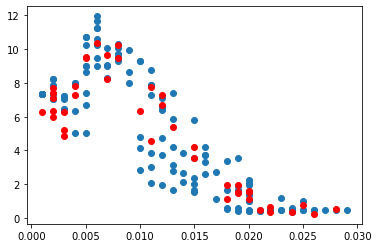

In [47]:
plt.scatter(df['k'], y)

plt.scatter(k_test, gbr_y_pred, color = 'r')

In [48]:
gbr_R2 = metrics.r2_score(y_test, gbr_y_pred)
print(gbr_R2)

0.8827744113132905


In [49]:
arr = [gbr, gbr_R2]
r2_scores.append(arr)

# Model selection

In [50]:
best_model = r2_scores[0]
for arr in r2_scores:
    if arr[1] > best_model[1]:
        best_model = arr

In [51]:
print(best_model)
model = best_model[0]

[GradientBoostingRegressor(criterion='mse'), 0.8827744113132905]


# Optimize

In [52]:
best_result = 0
best_parameters = {'ob_level': -1,
                  'os_level': -1,
                  'k': -1}
for k in np.arange(0.001, 0.030, 0.001):
    for ob_level in range(43, 63):
        for os_level in range(-63, -43):
            prediction = model.predict([[ob_level, os_level, k]])
            if prediction > best_result:
                best_result = prediction
                best_parameters = {'ob_level': ob_level,
                                  'os_level': os_level,
                                  'k': k}

In [53]:
best_result

array([11.60566824])

In [54]:
best_parameters

{'ob_level': 51, 'os_level': -50, 'k': 0.006}